# Algoritmos de classificação


https://www.kaggle.com/datasets/gabrielsantello/advertisement-click-on-ad

Neste projeto estaremos trabalhando com um conjunto de dados falso de publicidade, indicando se um usuário de internet específico clicou ou não em uma propaganda. Vamos tentar criar um modelo que preveja se clicará ou não em um anúncio baseado nos recursos desse usuário.

Este conjunto de dados contém os seguintes recursos:

* 'Daily Time Spent on Site': tempo no site em minutos.
* 'Age': idade do consumidor.
* 'Area Income': Média da renda do consumidor na região.
* 'Daily Internet Usage': Média em minutos por di que o consumidor está na internet.
* 'Linha do tópico do anúncio': Título do anúncio.
* 'City': Cidade do consumidor.
* 'Male': Se o consumidor era ou não masculino.
* 'Country': País do consumidor.
* 'Timestamp': hora em que o consumidor clicou no anúncio ou janela fechada.
* 'Clicked on Ad'': 0 ou 1 indicam se clicou ou não no anúncio.

### Soluções interessantes:

https://www.kaggle.com/code/faressayah/logistic-regression-for-binary-classification-task#3.-Prepare-Data-for-Logistic-Regression

https://www.kaggle.com/code/pyrotech/clicked-on-ad




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('advertising.csv')

print(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB
None


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


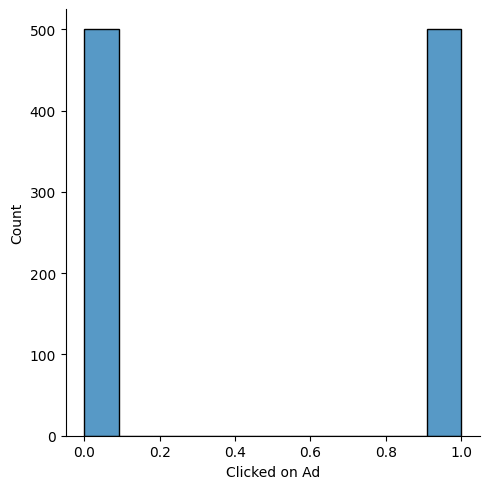

In [3]:
# A base está equilibrada entre pessoas que clicou e que não clicou?
sns.displot(data=df["Clicked on Ad"])

In [4]:
df.select_dtypes(include="number").head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


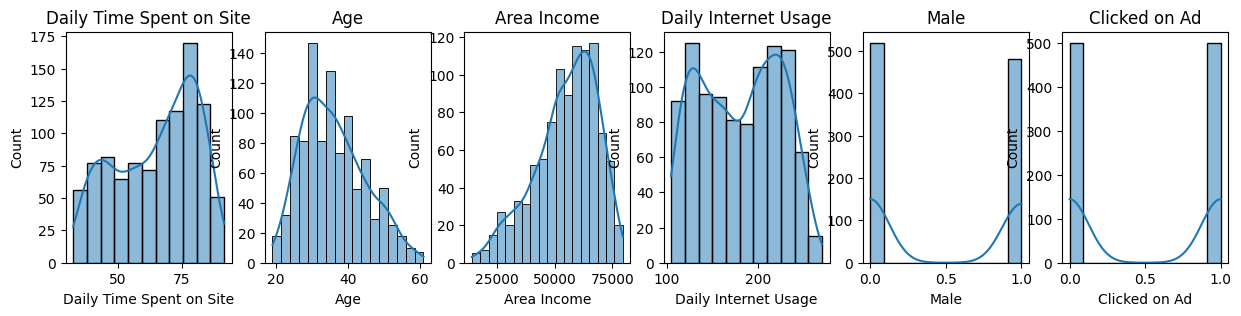

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15, 3))

i = 0
for col in df.select_dtypes(include="number").columns:
   sns.histplot(data=df[col], kde=True, ax=axes[i])
   axes[i].set_title(col)
   i+= 1

<Axes: xlabel='Clicked on Ad', ylabel='Age'>

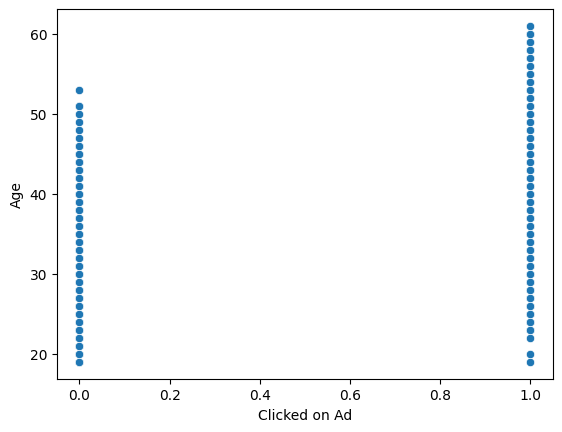

In [6]:
# Hipótese: pessoas mais novas tem maior tendência em clicar em um anuncio

sns.scatterplot(x='Clicked on Ad', y='Age', data=df)

<Axes: xlabel='Age', ylabel='Daily Internet Usage'>

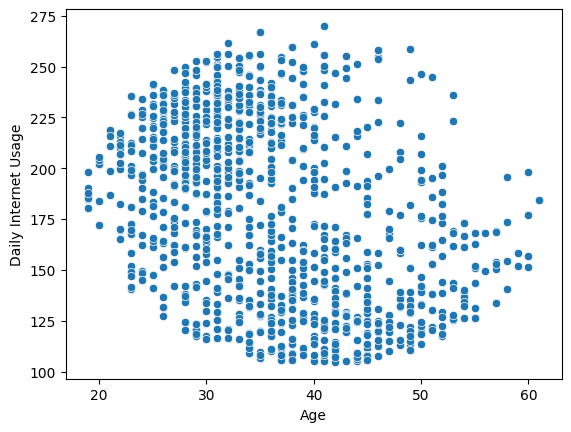

In [7]:
# Hipótese: pessoas mais novas, ficam mais tempo na internet.

sns.scatterplot(x='Age', y='Daily Internet Usage', data=df)

<Axes: xlabel='Age', ylabel='Daily Internet Usage'>

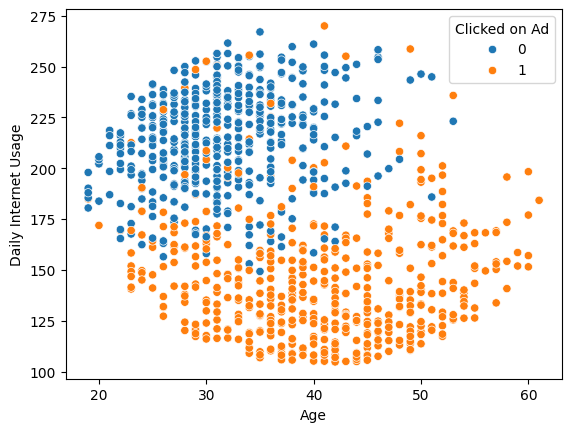

In [8]:
# Hipótese: pessoas mais novas, ficam mais tempo na internet e quem fica mais tempo na internet, clica mais nos anúncios

sns.scatterplot(x='Age', y='Daily Internet Usage', data=df, hue='Clicked on Ad')

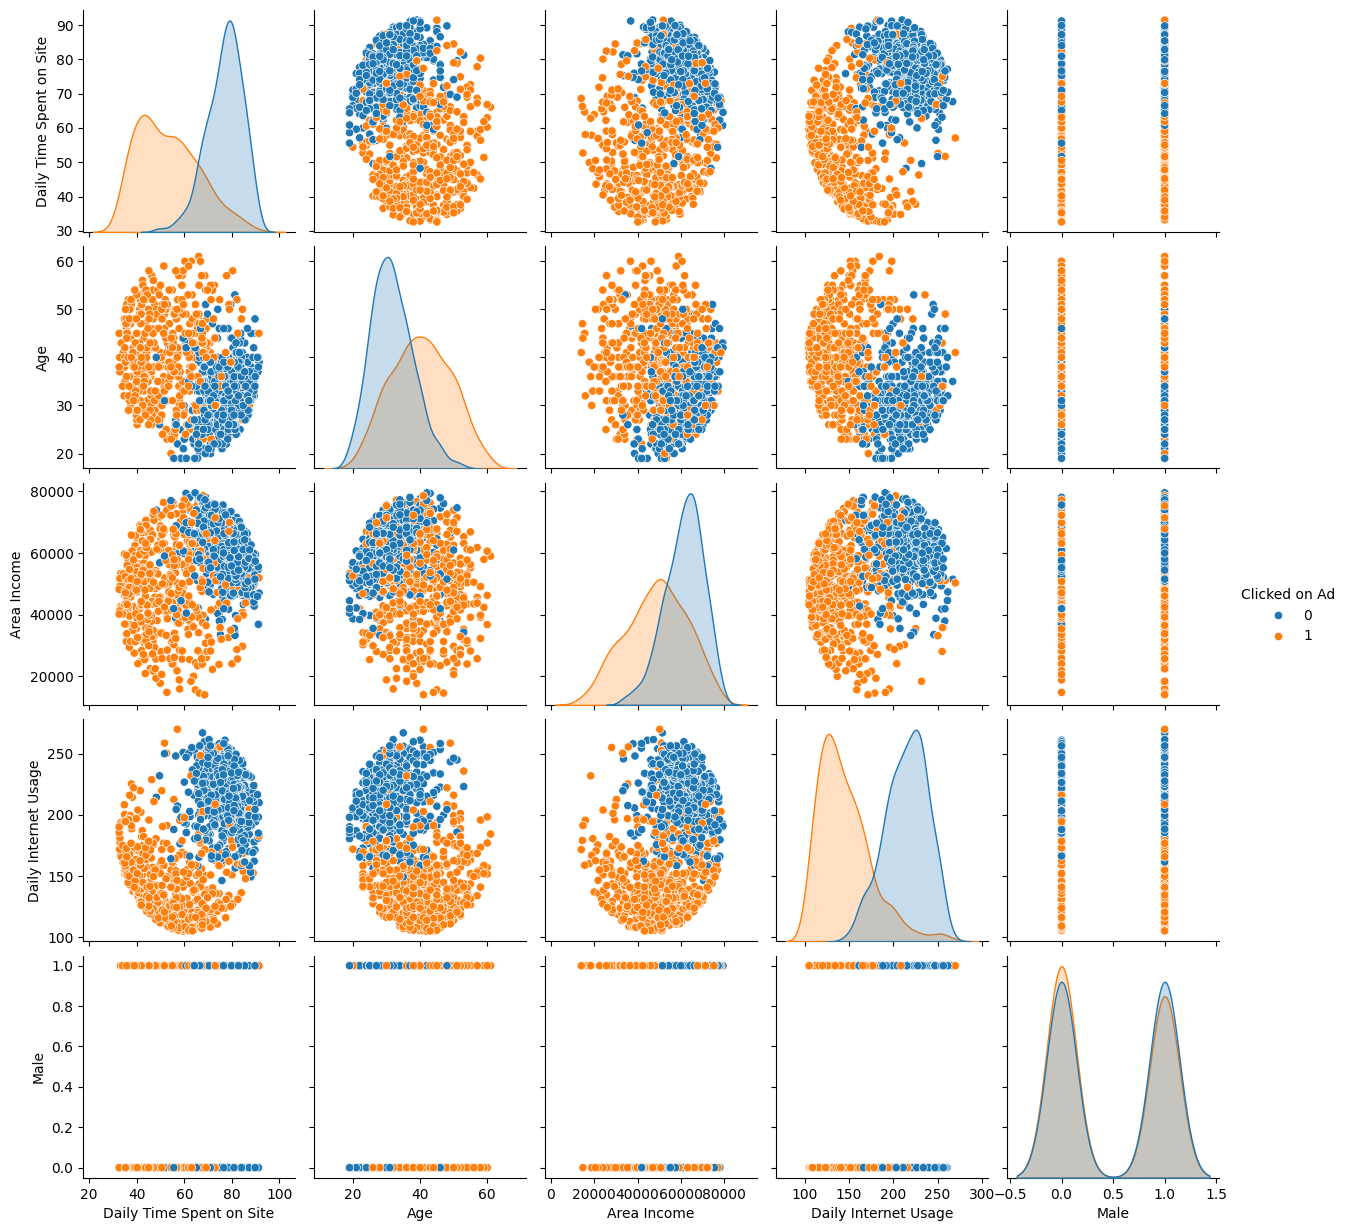

In [9]:
sns.pairplot(df, hue='Clicked on Ad')

# Correlação

<Axes: >

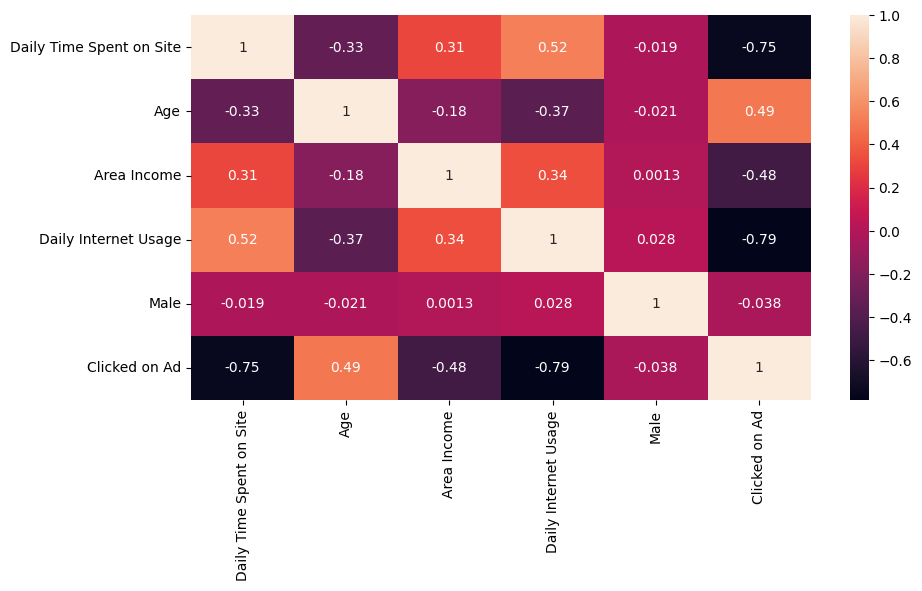

In [10]:
correlacao_1 = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 5))
sns.heatmap(correlacao_1, annot=True)

In [4]:
cols_for_model_input = [
    "Daily Time Spent on Site",
    "Age",
    "Area Income",
    "Daily Internet Usage"
    ]

X = df[cols_for_model_input]
y = df['Clicked on Ad']

# Agora é hora de treinar o modelo


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lr = LogisticRegression(max_iter=200)
model_lr.fit(X_train, y_train)

predictions_lr = model_lr.predict(X_test)

# Avaliação de um modelo de classificação

In [6]:
resultado = pd.DataFrame(zip(predictions_lr, y_test), columns=["prediction_lr", "target"])

resultado.shape
#resultado.loc[resultado.prediction_lr != resultado.target]

(200, 2)

In [7]:
 resultado.loc[resultado.prediction_lr != resultado.target].count()


,0
prediction_lr,10
target,10


# UAU!

De 200 previsões que ele fez, acertou 190!!

`190 / 200 = 0.95 (95%)`

# Matriz de confusão

* Verdadeiro Positivo (VP): Era positivo e o modelo previu como positivo;

* Verdadeiro Negativo (VN): Era negativo e o modelo previu como negativo;

* Falso Positivo (FP): Era negativo e o modelo previu como positivo;

* Falso Negativo (FN): Era positivo e o modelo previu como negativo;

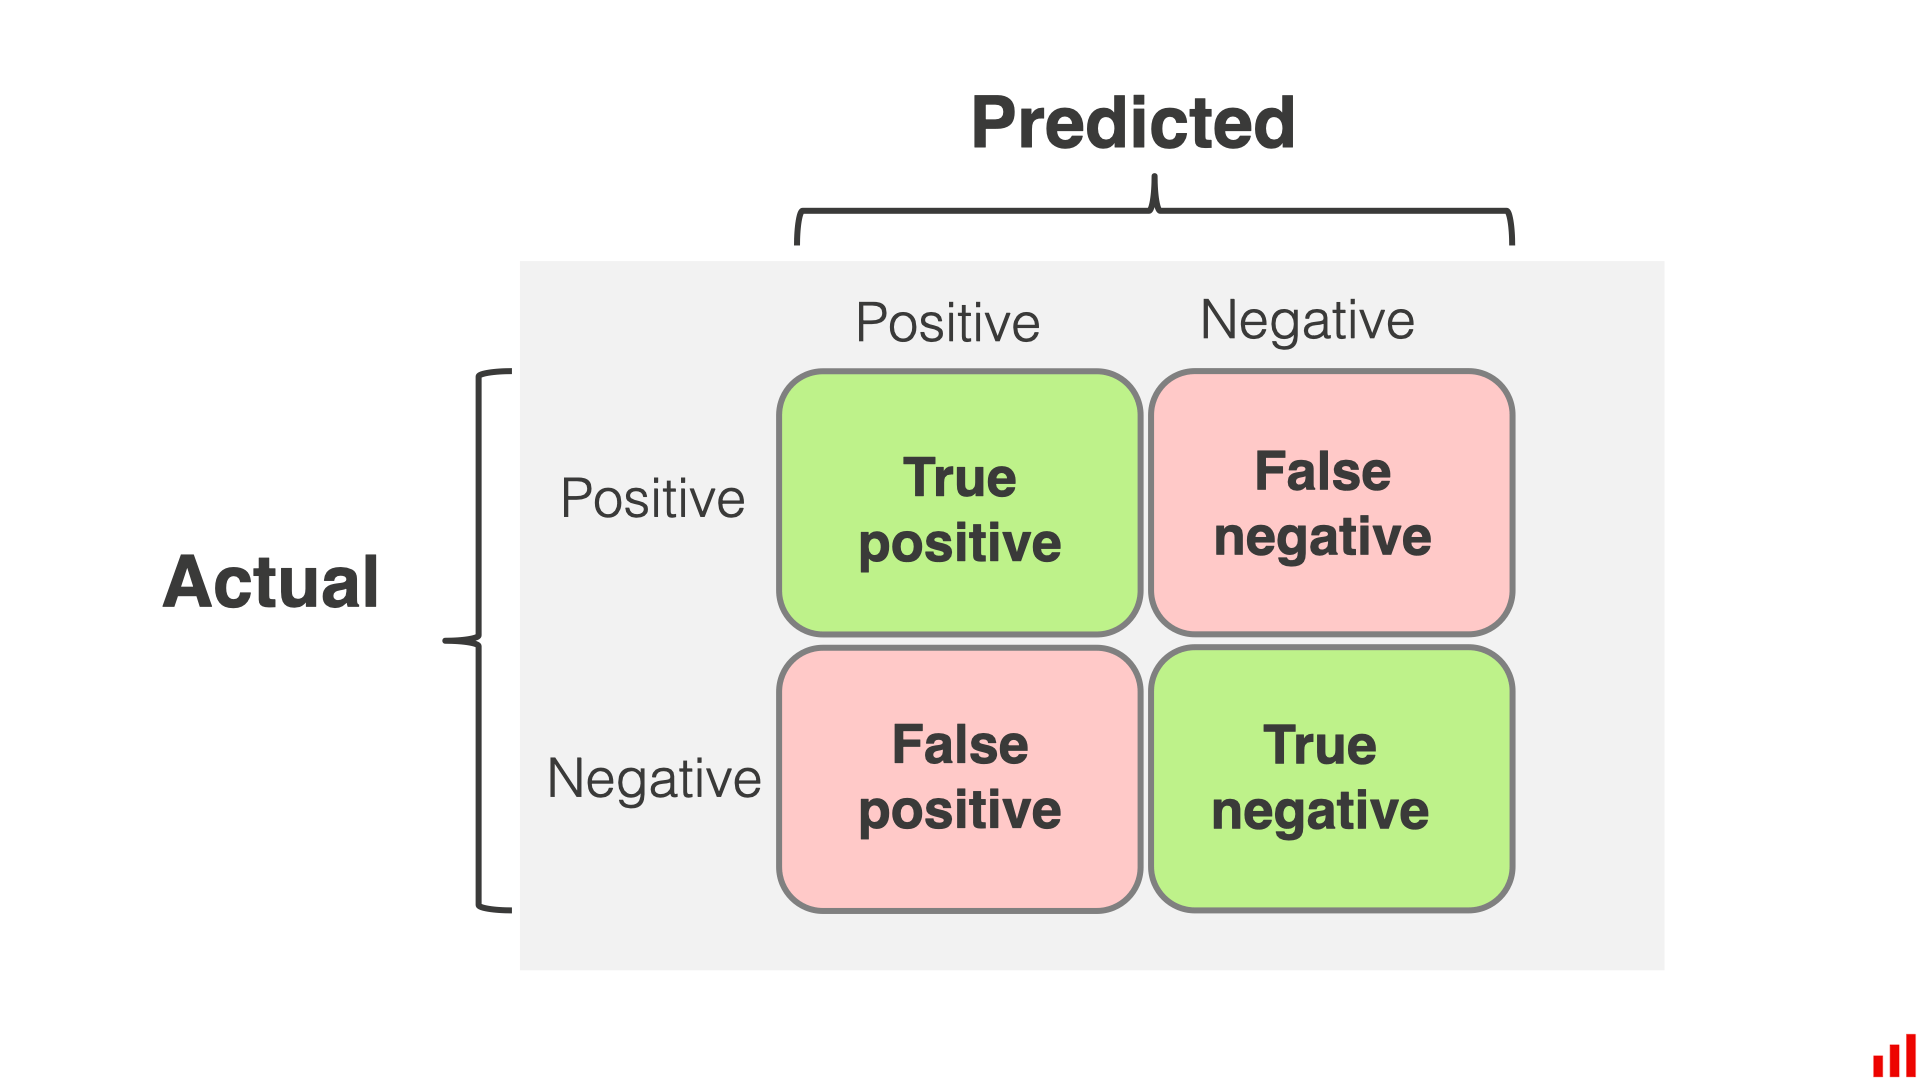

[[ 85   4]
 [  6 105]]


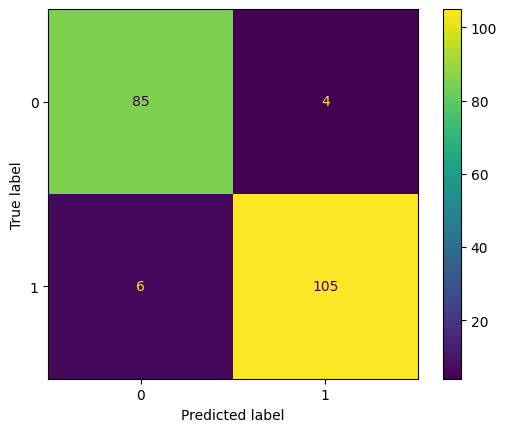

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

confusion_matrix_lr = confusion_matrix(y_test, predictions_lr)
print(confusion_matrix_lr)

cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lr, display_labels = [0, 1])
cm_display.plot()
plt.show()

# Novas métricas a partir da matriz

In [16]:
print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        89
           1       0.96      0.95      0.95       111

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [17]:
# Acurácia
190 / 200 # (Todos acertos / Todos os dados)

0.95

## Precisão:

` VP / (VP + FP)`

A precisão é o número de exemplos que seu modelo previu como positivos e acertou dividido pelo número total de exemplos que ele previu como positivos.

Quantos VP realmente estão corretos?

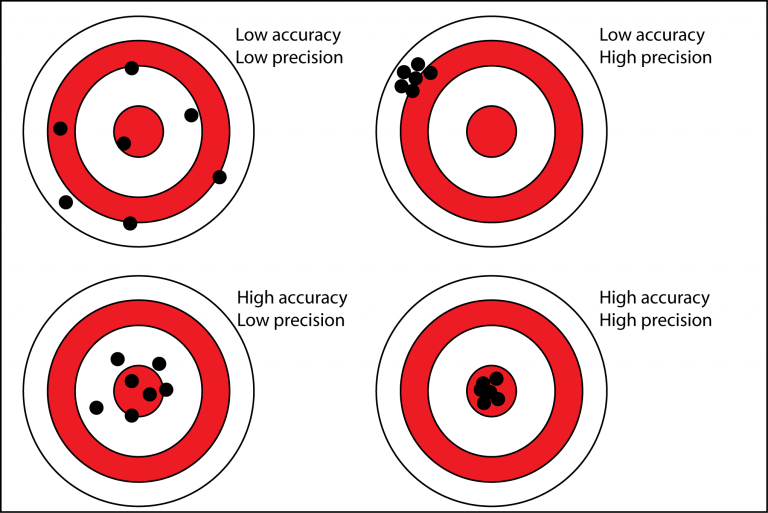

## Revocação:

`VP / (VP + FN)`

A revocação é o número de VP que o modelo realmente foi capaz de detectar.

Dentre todos os casos de VP, quantos o modelo foi capaz de encontrar?

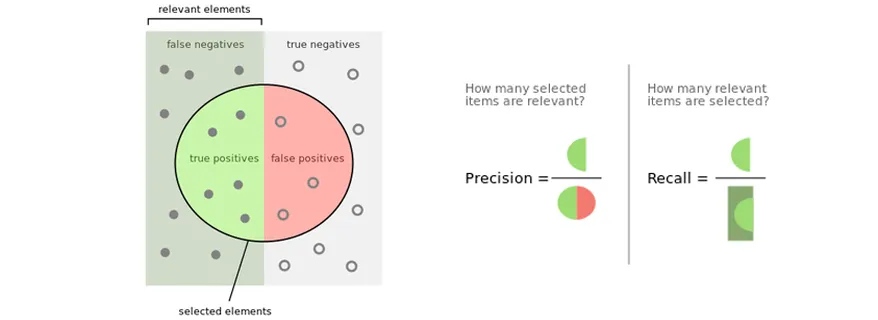

# f1-score

 média harmônica entre a precisão e o recall

# Vamos ver a acurácia para difrentes modelos

In [11]:
classifiers[0]

('Logistic Regression', LogisticRegression(random_state=42))

In [9]:
# https://www.kaggle.com/code/pyrotech/clicked-on-ad

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


classifiers = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
    # Add more classifiers as needed
]


for model_name, name_class in classifiers:
    # Fit the classifier on the training data
    name_class.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = name_class.predict(X_test)

    # Calculate accuracy (you can use other metrics as well)
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy for each classifier
    print(f'{model_name}: Accuracy = {accuracy:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 0.95
Decision Tree: Accuracy = 0.93
Random Forest: Accuracy = 0.93
K-Nearest Neighbors: Accuracy = 0.68
Support Vector Machine: Accuracy = 0.68
Naive Bayes: Accuracy = 0.94


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost: Accuracy = 0.94
Gradient Boosting: Accuracy = 0.93


In [12]:
model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [14]:
import pickle

filename = "model_latest.pkl"
pickle.dump(model, open(filename, 'wb'))

In [15]:
# Daily Time Spent on Site
# Age
# Area Income
# Daily Internet Usage

novo_input = [[68, 35, 62000, 200]]
model.predict(novo_input)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [16]:
novo_input = [[63, 29, 54787, 120]]
model.predict(novo_input)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [17]:
mode_l = pickle.load(open("model_latest.pkl", "rb"))
mode_l.predict(novo_input)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [19]:
X.dtypes

,0
Daily Time Spent on Site,float64
Age,int64
Area Income,float64
Daily Internet Usage,float64
